In [1]:
import pandas_datareader as pdr
import datetime
import numpy as np
import quandl
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
quandl.ApiConfig.api_key = 'zv2VUMNnewyrQQusszgq'
mydata = quandl.get('XBOM/500010', start_date='2015-01-01', end_date='2018-12-31')

In [3]:
print(mydata.head())

                   Open         High          Low        Close    Volume  \
Date                                                                       
2015-01-01  1083.643516  1083.643516  1070.742998  1073.562000   36260.0   
2015-01-02  1073.131983  1124.638495  1073.131983  1119.764966   91131.0   
2015-01-05  1125.689649  1126.645243  1099.936392  1105.287718   49817.0   
2015-01-06  1096.066237  1098.933019  1046.375353  1053.494527  117772.0   
2015-01-07  1055.596834  1065.630570  1047.760964  1051.201102  110656.0   

            Adjustment Factor  Adjustment Type  
Date                                            
2015-01-01                NaN              NaN  
2015-01-02                NaN              NaN  
2015-01-05                NaN              NaN  
2015-01-06                NaN              NaN  
2015-01-07                NaN              NaN  


In [4]:
print(mydata.shape)

(1043, 7)


In [5]:
print(type(mydata))
mydata.to_csv('housingFin.csv')

<class 'pandas.core.frame.DataFrame'>


In [6]:
mydata.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor',
       'Adjustment Type'],
      dtype='object')

In [7]:
mydata = mydata.drop(['Adjustment Factor','Adjustment Type'],axis=1)
mydata.head()

Open         High          Low        Close    Volume
Date                                                                    
2015-01-01  1083.643516  1083.643516  1070.742998  1073.562000   36260.0
2015-01-02  1073.131983  1124.638495  1073.131983  1119.764966   91131.0
2015-01-05  1125.689649  1126.645243  1099.936392  1105.287718   49817.0
2015-01-06  1096.066237  1098.933019  1046.375353  1053.494527  117772.0
2015-01-07  1055.596834  1065.630570  1047.760964  1051.201102  110656.0

/home/ayush/.local/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.5/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


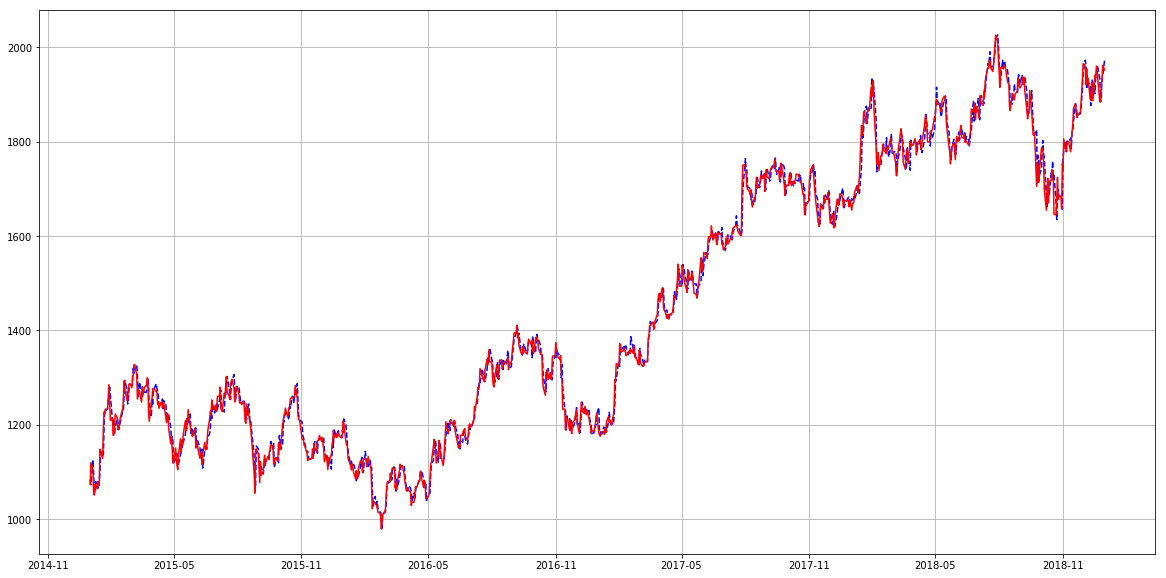

In [8]:
plt.figure(figsize=(20,10))
plt.grid('On')
plt.plot(mydata['Open'],'b--')
plt.plot(mydata['Close'],'r-')

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=mydata.index,
                open=mydata['Open'],
                high=mydata['High'],
                low=mydata['Low'],
                close=mydata['Close'])])

fig.show()

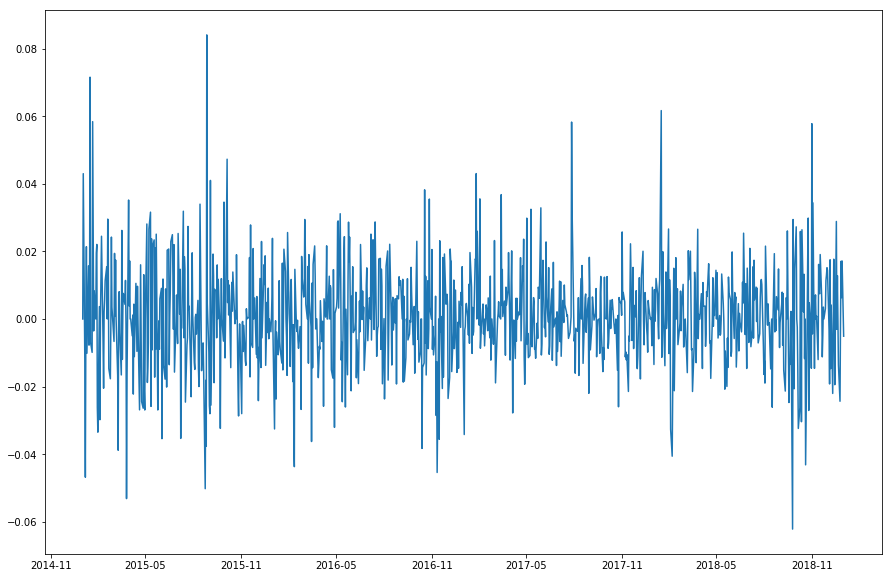

In [10]:
daily_close = mydata['Close']

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

plt.figure(figsize=(15,10))
plt.plot(daily_pct_change)

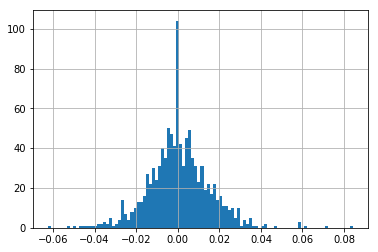

In [11]:
daily_pct_change.hist(bins=100)

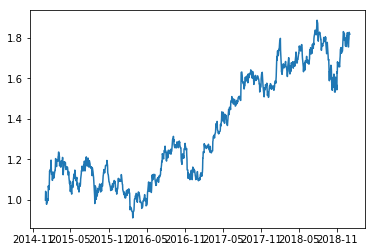

In [12]:
cum_daily_return = (1 + daily_pct_change).cumprod()
plt.plot(cum_daily_return)

In [13]:
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

Date
2015-01-31    1.070952
2015-02-28    1.147890
2015-03-31    1.188496
2015-04-30    1.142422
2015-05-31    1.088411
2015-06-30    1.096554
2015-07-31    1.177450
2015-08-31    1.112997
2015-09-30    1.049936
2015-10-31    1.141970
2015-11-30    1.071951
2015-12-31    1.079704
2016-01-31    1.043992
2016-02-29    0.981314
2016-03-31    1.010685
2016-04-30    0.991363
2016-05-31    1.060617
2016-06-30    1.102906
2016-07-31    1.193279
2016-08-31    1.231614
2016-09-30    1.276295
2016-10-31    1.239466
2016-11-30    1.170444
2016-12-31    1.129313
2017-01-31    1.139737
2017-02-28    1.260379
2017-03-31    1.295516
2017-04-30    1.363412
2017-05-31    1.403888
2017-06-30    1.478048
2017-07-31    1.509966
2017-08-31    1.590439
2017-09-30    1.612515
2017-10-31    1.587044
2017-11-30    1.565448
2017-12-31    1.549199
2018-01-31    1.664638
2018-02-28    1.667073
2018-03-31    1.656031
2018-04-30    1.688067
2018-05-31    1.710044
2018-06-30    1.700846
2018-07-31    1.805624
2018-0

# Moving Averages

In [14]:
mydata.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

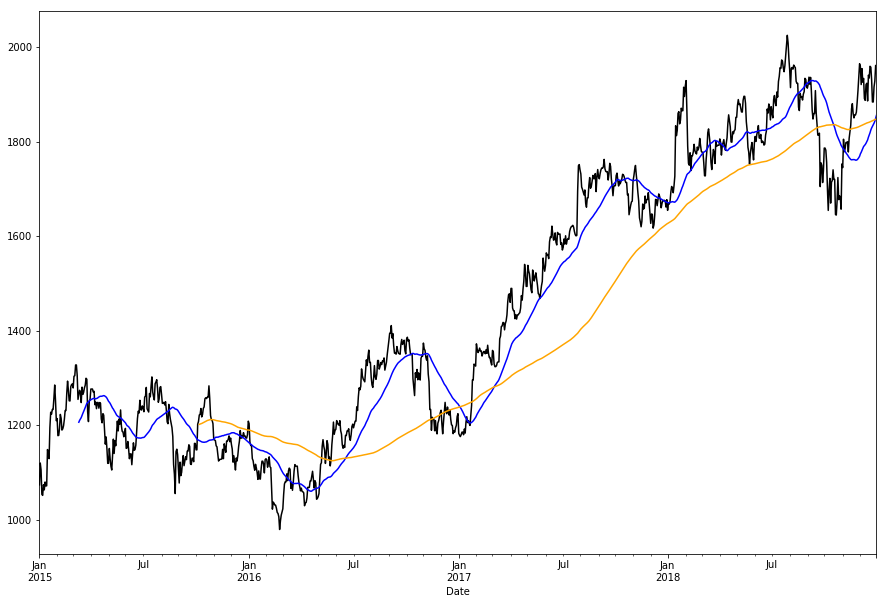

In [15]:
plt.figure(figsize=(15,10))
mydata['Close'].plot(color='black')
moving_50 = mydata['Close'].rolling(50).mean()
moving_50 .plot(color='b')

moving_200 = mydata['Close'].rolling(200).mean()
moving_200.plot(color='orange')

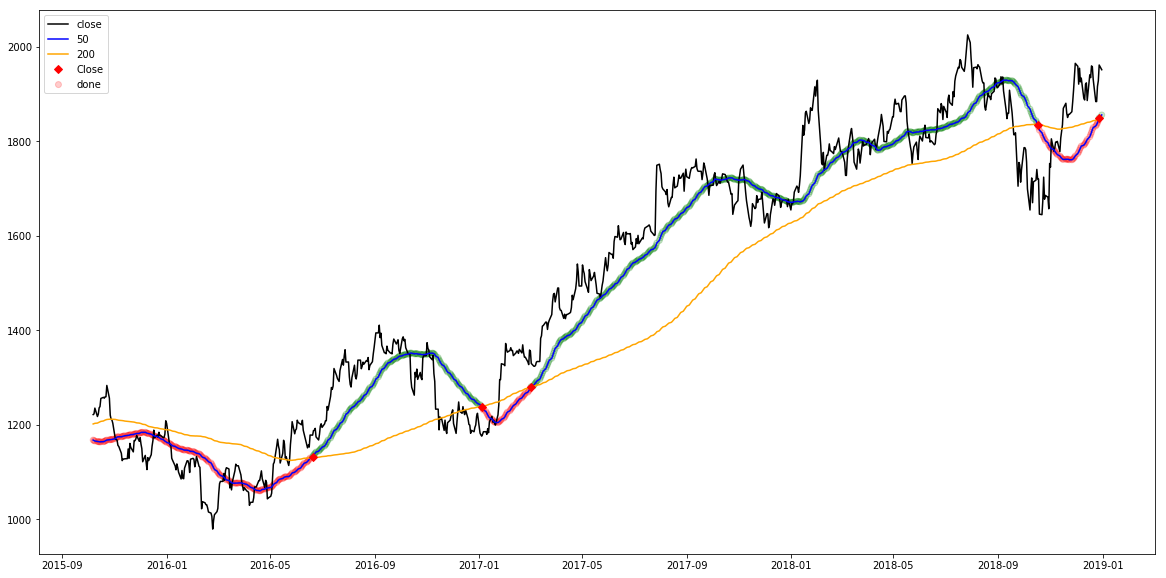

In [16]:
plt.figure(figsize=(20,10))
moving_200 = moving_200.dropna()
moving_50 = moving_50.iloc[len(moving_50)-len(moving_200):]
close_50 = mydata['Close']
close_50 = close_50.iloc[len(close_50)-len(moving_200):]

plt.plot(moving_50.index,close_50,color='black',label='close')
plt.plot(moving_50.index,moving_50,color='blue',label='50')
plt.plot(moving_50.index,moving_200,color='orange',label='200')

my_color_50 = np.where(moving_50>moving_200,'g','r')
plt.scatter(moving_50.index,moving_50,color=my_color_50,alpha=0.2,label='done')

price_diff = (moving_50 - moving_200)
zero_crossings_50 = np.where(np.diff(np.sign(price_diff)))[0]
zero_crossings_50+=1
plt.plot(moving_50.index[zero_crossings_50],moving_50[zero_crossings_50],'rD')

plt.legend()

In [17]:
buy = 0
sell = 0
net_profit_50 = 0

if my_color_50[zero_crossings_50[0]] == 'r':
    sell = close_50[zero_crossings_50[0]]
else :
    buy = close_50[zero_crossings_50[0]]

for i in zero_crossings_50[1:]:
    if my_color_50[i] == 'r':
        print("Time to sell")
        print(i,close_50[i],buy,sell,close_50[i] - buy)
        net_profit_50 += close_50[i] - buy
        sell = close_50[i]
    else : 
        print("Time to buy")
        print(i,close_50[i],buy,sell,sell-close_50[i])
        net_profit_50+=sell-close_50[i]
        buy = close_50[i]
        
print("Net profit = ",net_profit_50)

Time to sell
325 1175.778417 1177.948962 0 -2.1705449999999473
Time to buy
367 1329.817511 1177.948962 1175.778417 -154.03909399999998
Time to sell
790 1720.255414 1329.817511 1175.778417 390.437903
Time to buy
842 1961.802538 1329.817511 1720.255414 -241.54712399999994
Net profit =  -7.318859999999859


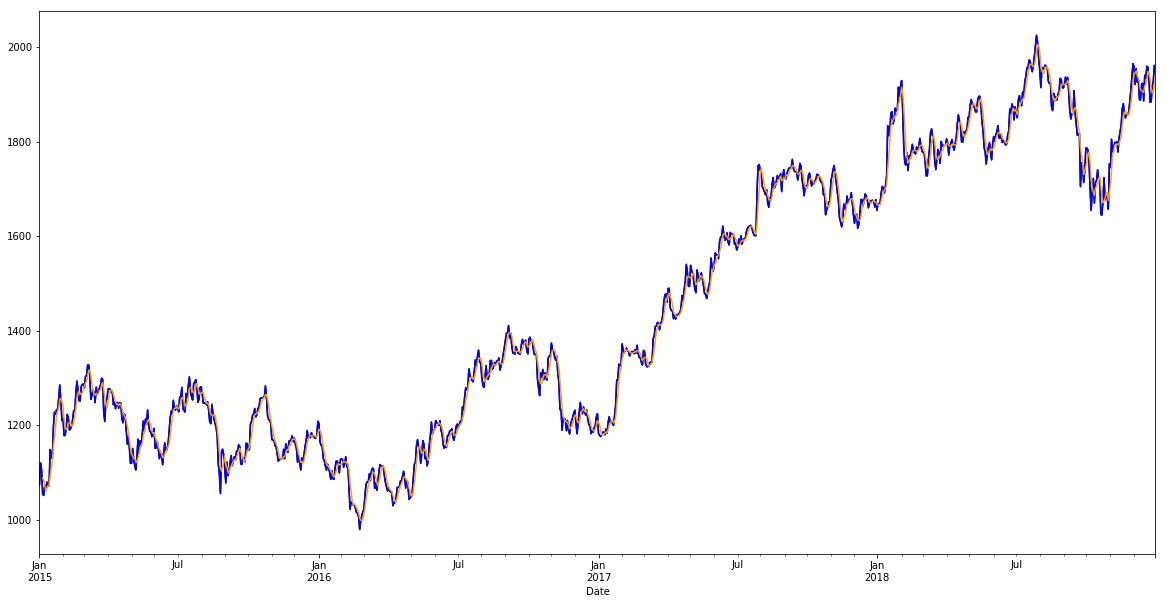

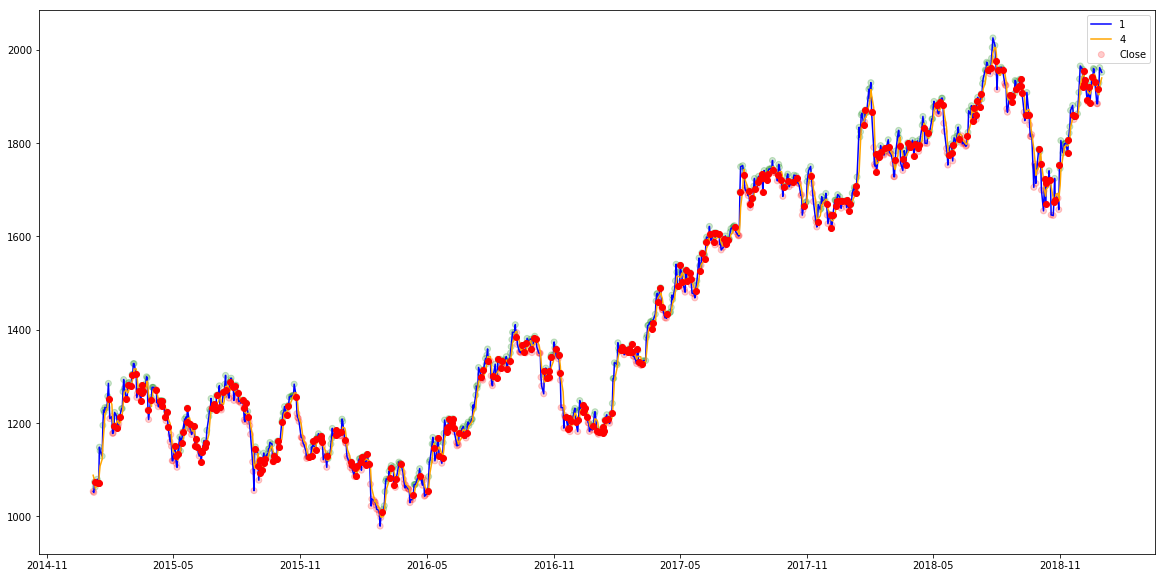

Net_Profit for  1 - 4 Moving Average =  188.14206099999979
Accuracy =  51.395572666025025 %


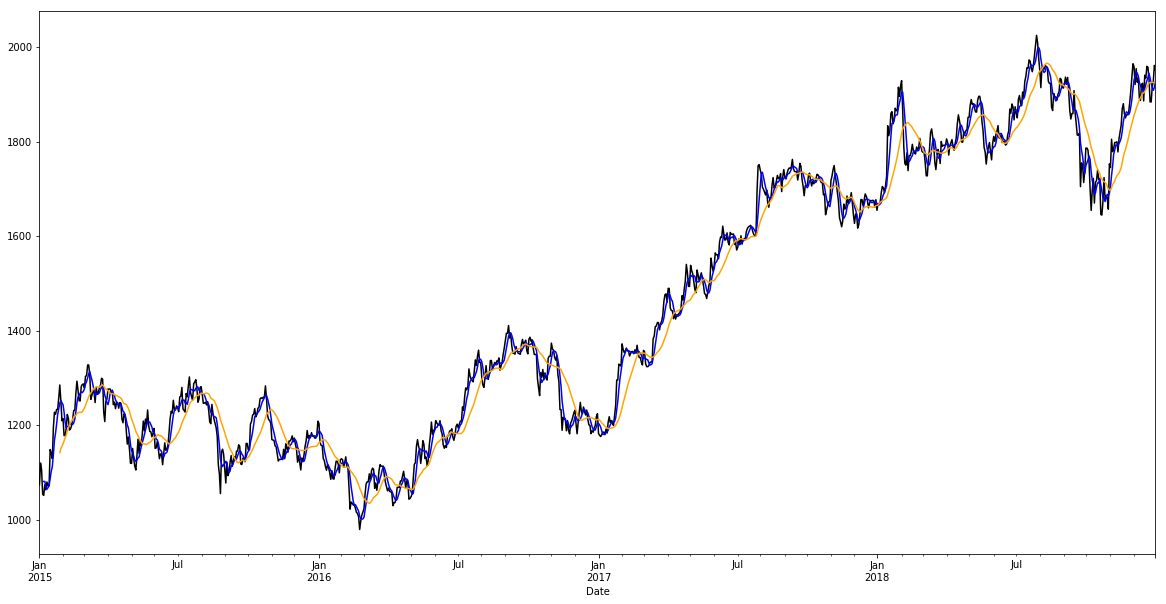

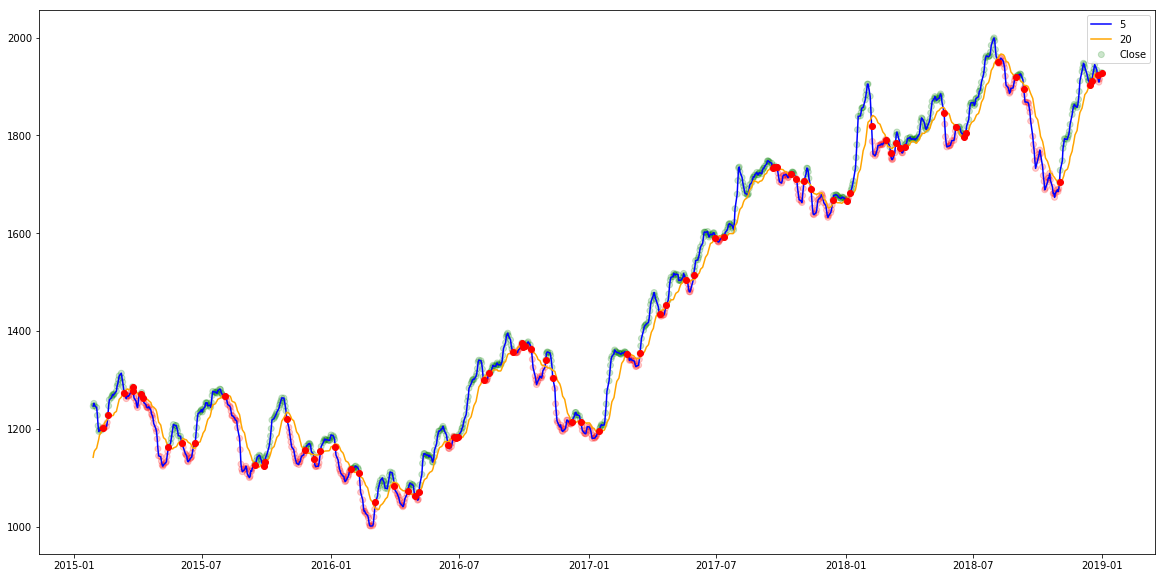

Net_Profit for  5 - 20 Moving Average =  -1046.7227729999995
Accuracy =  55.816226783968716 %


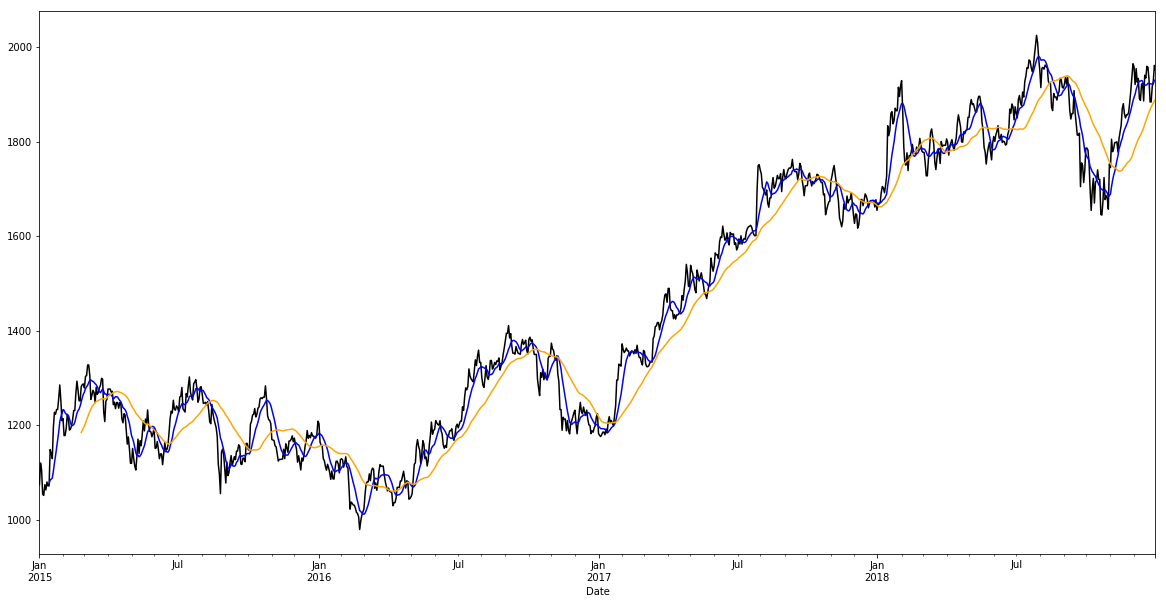

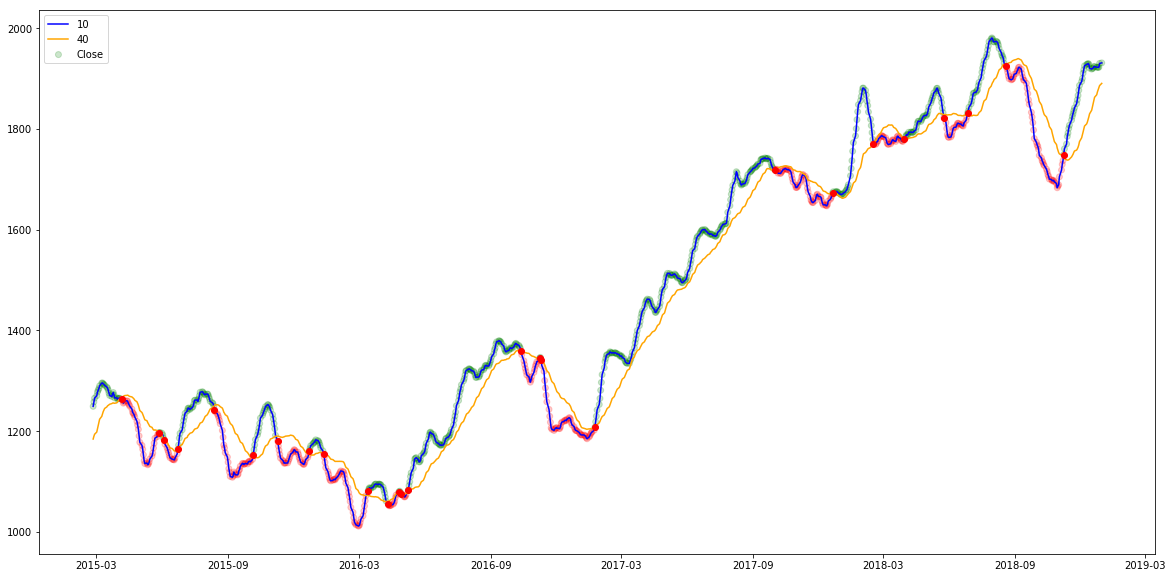

Net_Profit for  10 - 40 Moving Average =  264.9542250000002
Accuracy =  52.34297108673977 %


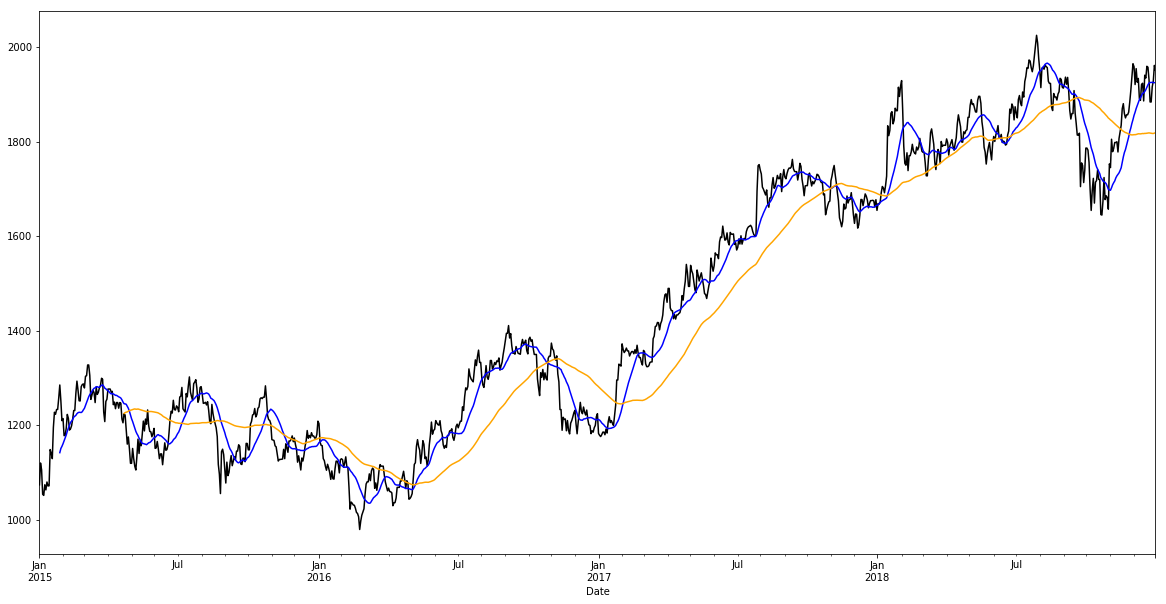

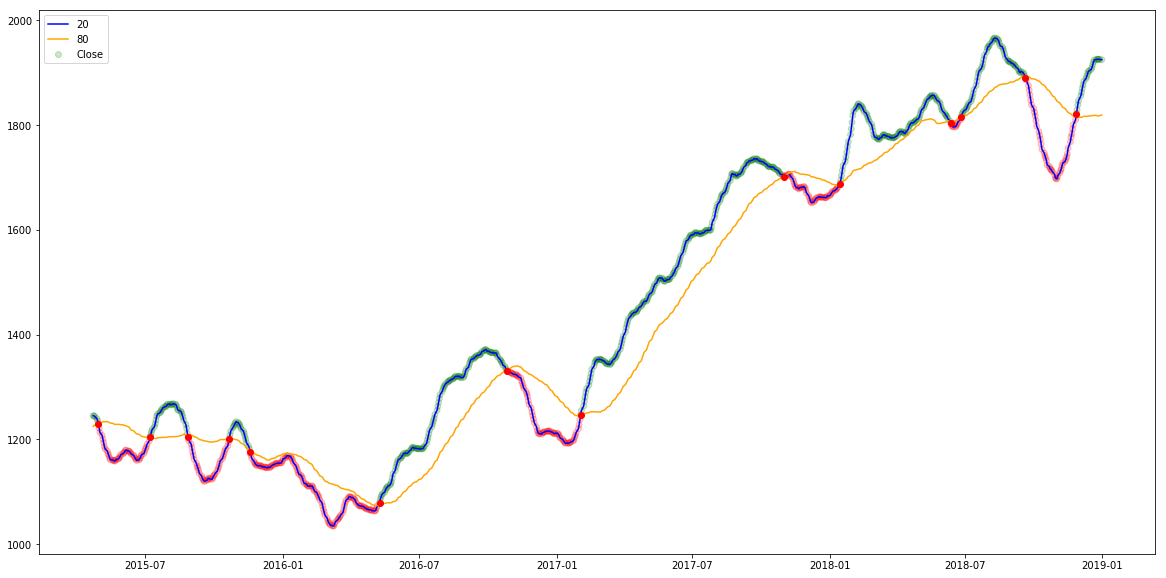

Net_Profit for  20 - 80 Moving Average =  -439.67857899999944
Accuracy =  54.62097611630322 %


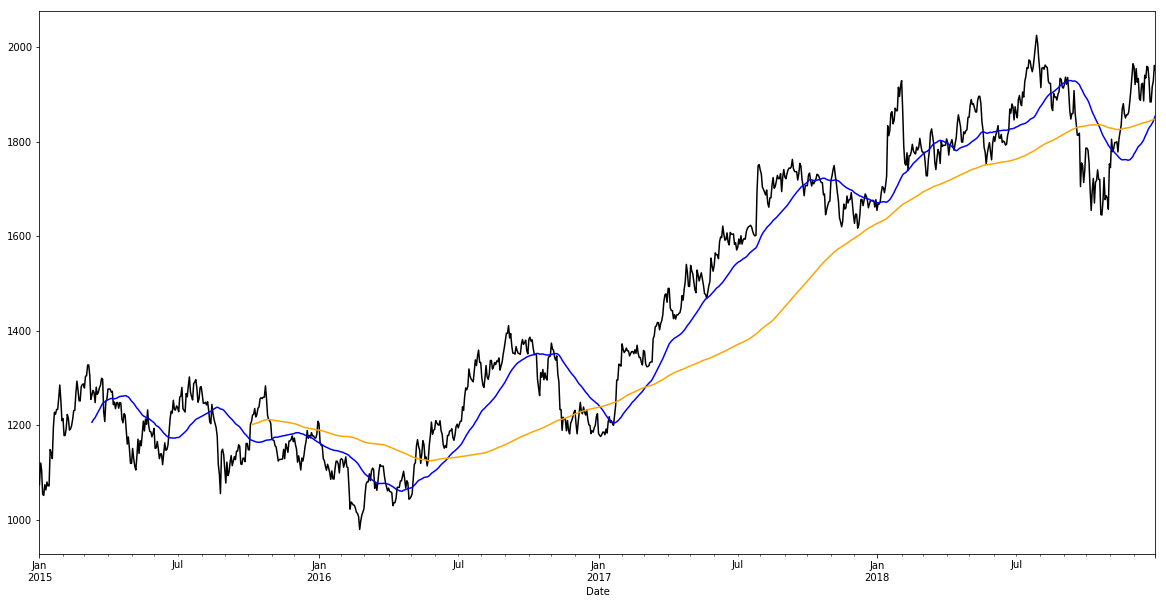

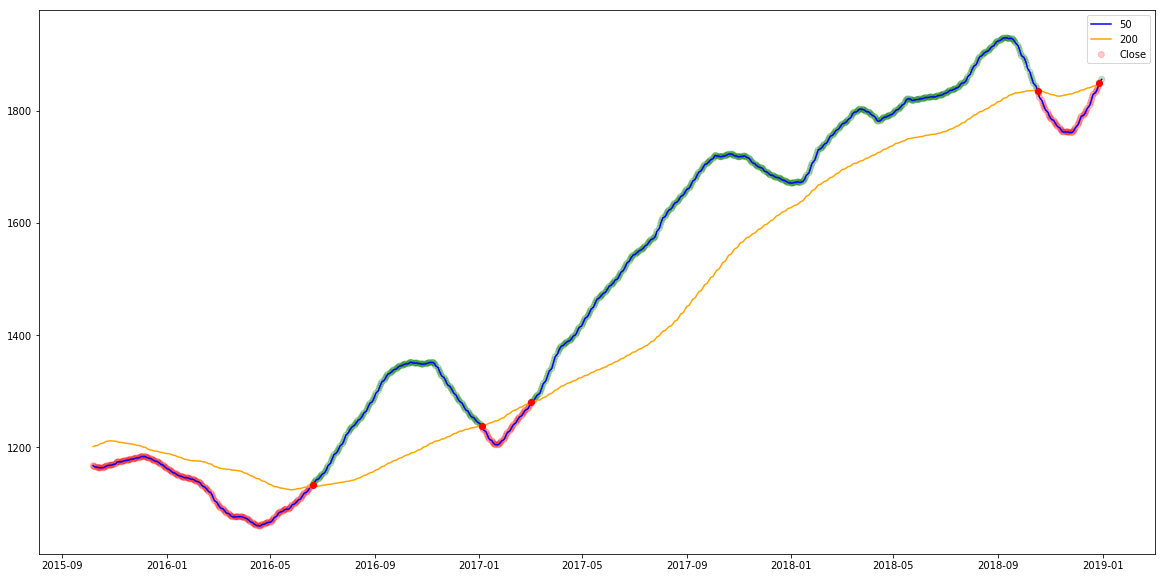

Net_Profit for  50 - 200 Moving Average =  -7.318859999999859
Accuracy =  52.55041518386714 %


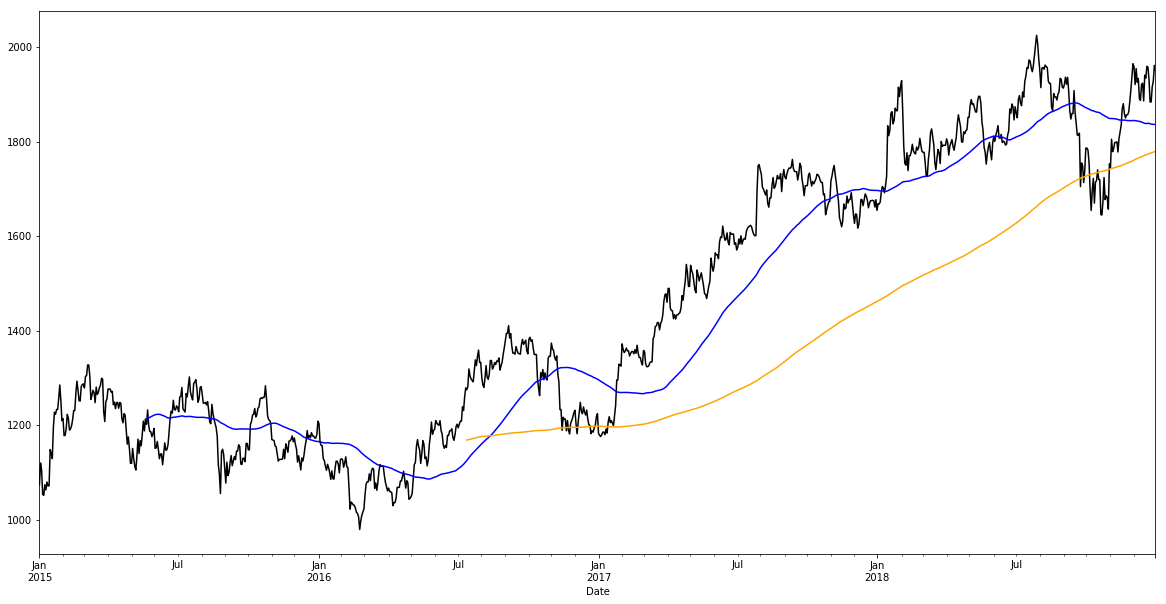

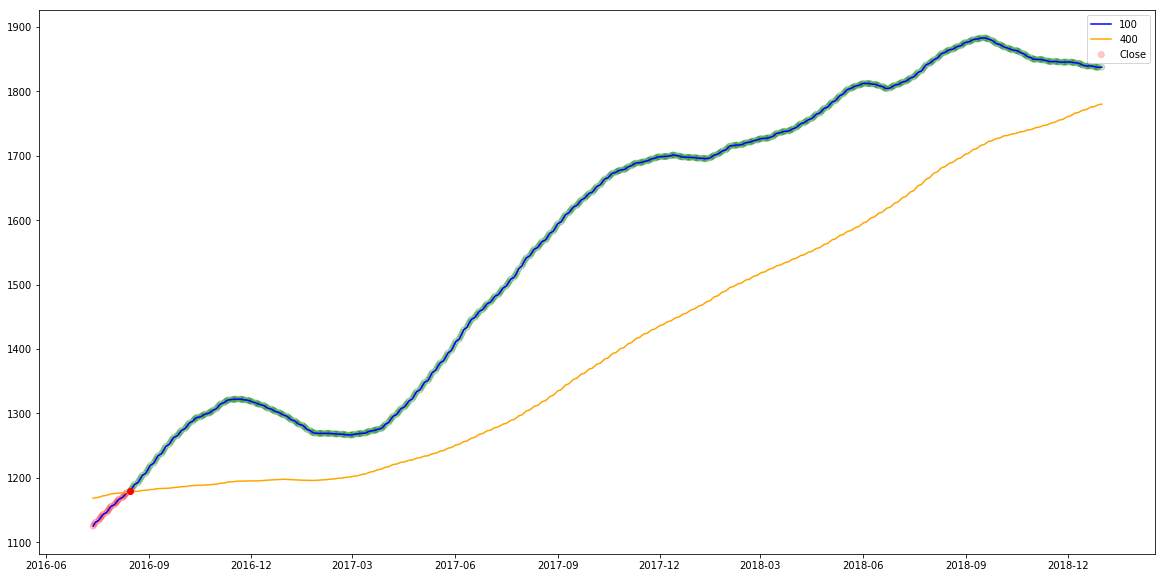

Net_Profit for  100 - 400 Moving Average =  0
Accuracy =  52.255054432348366 %


In [18]:
window = [1,5,10,20,50,100]

for i in window:
    plt.figure(figsize=(20,10))
    mydata['Close'].plot(color='black')
    moving_i = mydata['Close'].rolling(i).mean()
    moving_i .plot(color='b')

    moving_4i = mydata['Close'].rolling(4*i).mean()
    moving_4i.plot(color='orange')
    plt.show()

    plt.figure(figsize=(20,10))
    moving_4i = moving_4i.dropna()
    moving_i = moving_i.iloc[len(moving_i)-len(moving_4i):]
    close_i = mydata['Close']
    close_i = close_i.iloc[len(close_i)-len(moving_4i):]

    plt.plot(moving_i.index,moving_i,color='blue',label=str(i))
    plt.plot(moving_i.index,moving_4i,color='orange',label=str(4*i))

    my_color_i = np.where(moving_i>moving_4i,'g','r')
    plt.scatter(moving_i.index,moving_i,color=my_color_i,alpha=0.2)
    plt.legend()

    price_diff_i = (moving_i - moving_4i)
    zero_crossings_i = np.where(np.diff(np.sign(price_diff_i)))[0]
    zero_crossings_i+=1
    plt.plot(moving_i.index[zero_crossings_i],moving_i[zero_crossings_i],'ro')
    plt.show()

    buy_i = 0
    sell_i = 0

    net_profit_i = 0

    if my_color_i[zero_crossings_i[0]] == 'r':
        sell_i = close_i[zero_crossings_i[0]]
    else :
        buy_i = close_i[zero_crossings_i[0]]

    for j in zero_crossings_i[1:]:
        if my_color_i[j] == 'r':
            net_profit_i += close_i[j] - buy_i
            sell_i = close_i[j]
        else : 
            net_profit_i+=sell_i-close_i[j]
            buy_i = close_i[j]

    print("Net_Profit for ",i,"-",4*i,"Moving Average = ",net_profit_i)
    
    num_true = 0
    num_false = 0

    for k,j in enumerate(my_color_i[:-1]):
        if j=='r':
            if close_i[k+1]>=close_i[k]:
                num_true+=1
            else:
                num_false+=1
        else:
            if close_i[k+1]<=close_i[k]:
                num_true+=1
            else:
                num_false+=1

    print('Accuracy = ',(num_true/(num_true+num_false))*100,'%')

## Kotak Mahindra BSE: 500247   |   NSE: KOTAKBANK 

In [19]:
tele_data = pd.read_csv('kotak.csv')

In [20]:
print(tele_data.shape,type(tele_data))
print(tele_data.columns)
tele_data.tail()

(500, 7) <class 'pandas.core.frame.DataFrame'>
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Spread'], dtype='object')


Date     Open     High      Low   Close  Volume  Spread
29-01-2018  1098.0  1118.65  1091.55  1113.50   61329    27.1  -15.50
25-01-2018  1084.8  1097.00  1065.00  1091.45  313170    32.0   -6.65
24-01-2018  1073.5  1085.00  1071.40  1080.70   61528    13.6   -7.20
23-01-2018  1071.3  1082.00  1071.20  1074.30   37738    10.8   -3.00
22-01-2018  1065.0  1078.25  1058.45  1071.30   41459    19.8   -6.30

In [21]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=tele_data.index,
                open=tele_data['Open'],
                high=tele_data['High'],
                low=tele_data['Low'],
                close=tele_data['Close'])])

fig.show()

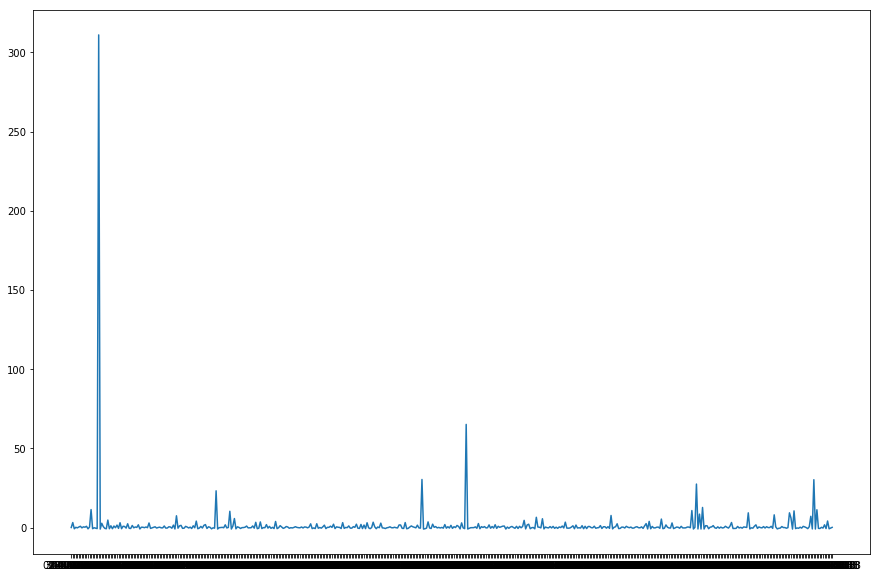

In [22]:
daily_close = tele_data['Close']

# Daily returns
daily_pct_change = daily_close.pct_change()

# Replace NA values with 0
daily_pct_change.fillna(0, inplace=True)

plt.figure(figsize=(15,10))
plt.plot(daily_pct_change)

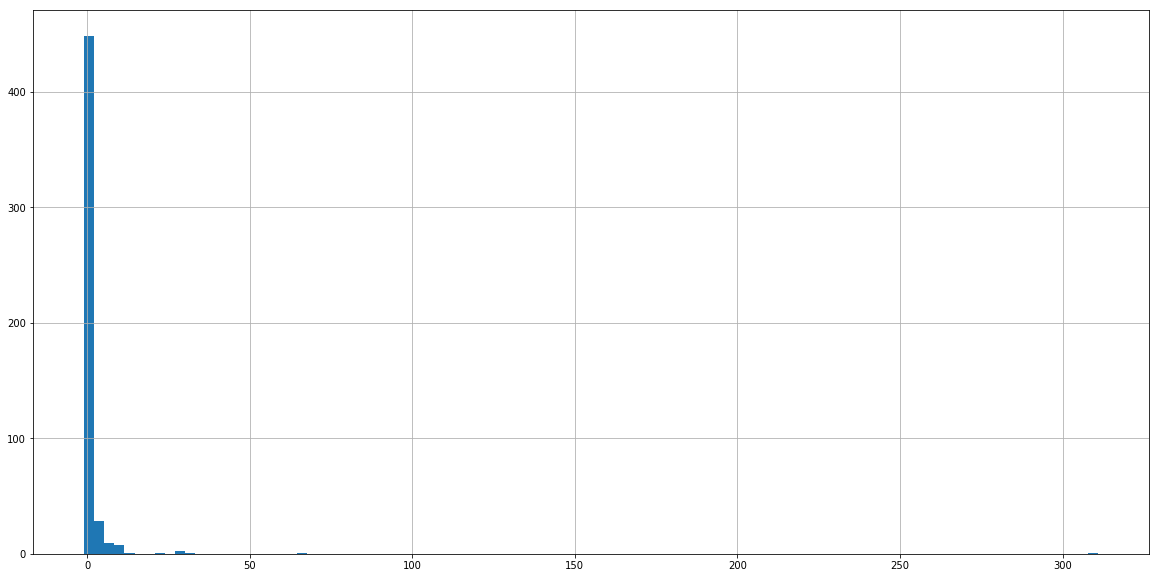

In [23]:
daily_pct_change.hist(bins=100,figsize=(20,10))

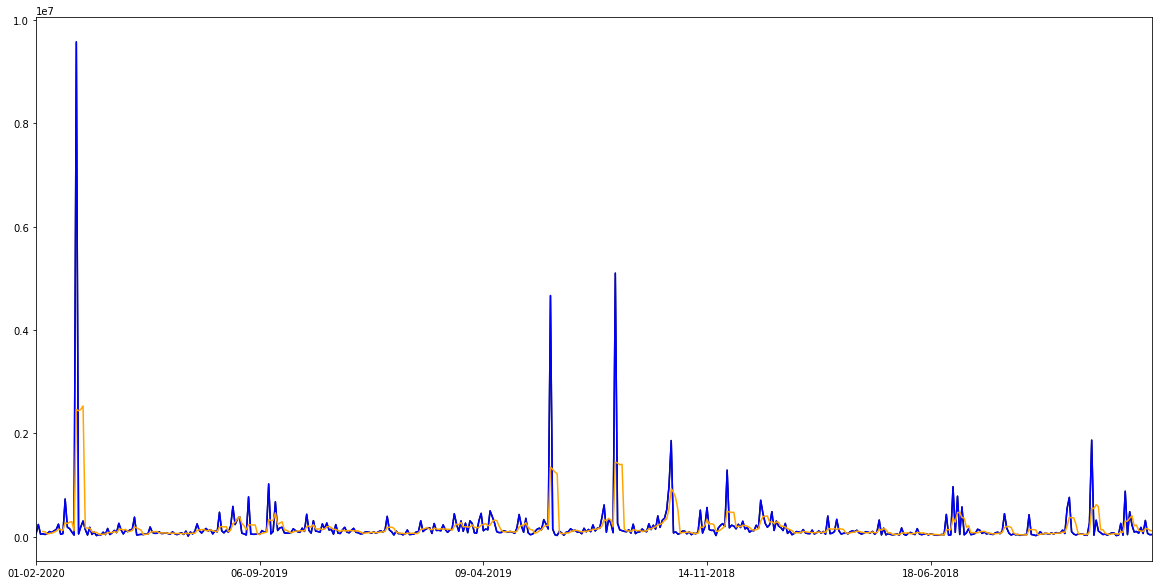

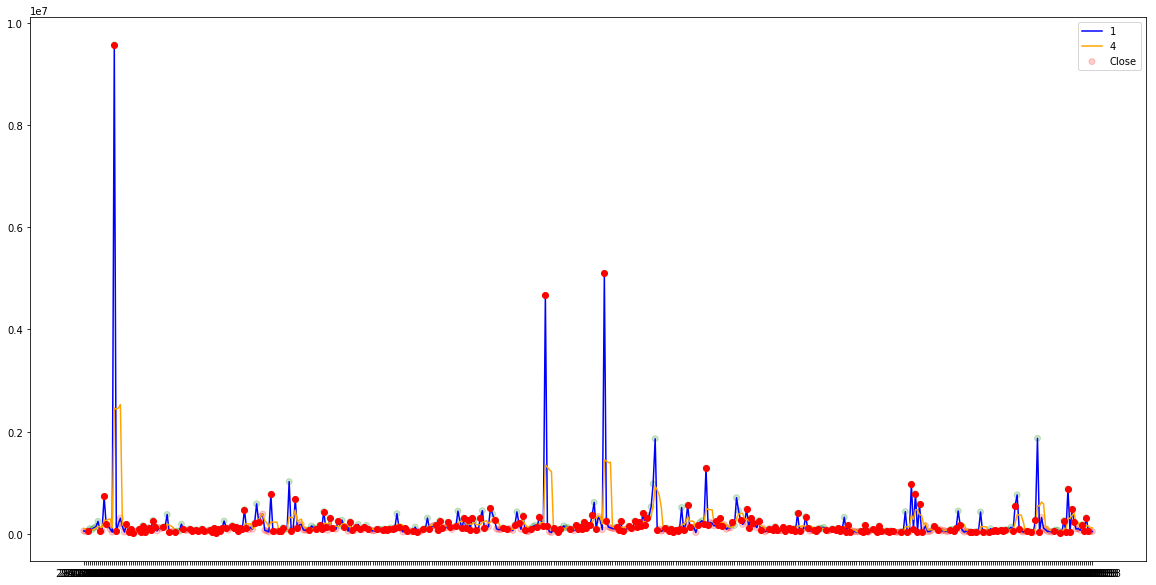

Net_Profit for  1 - 4 Moving Average =  -70262894
Accuracy =  69.75806451612904 %


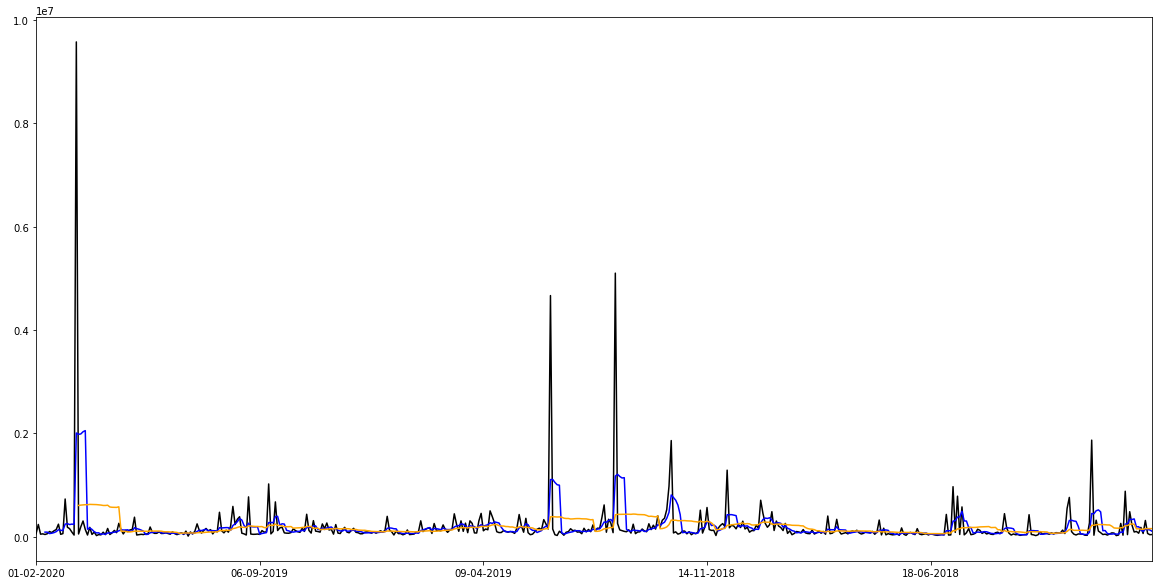

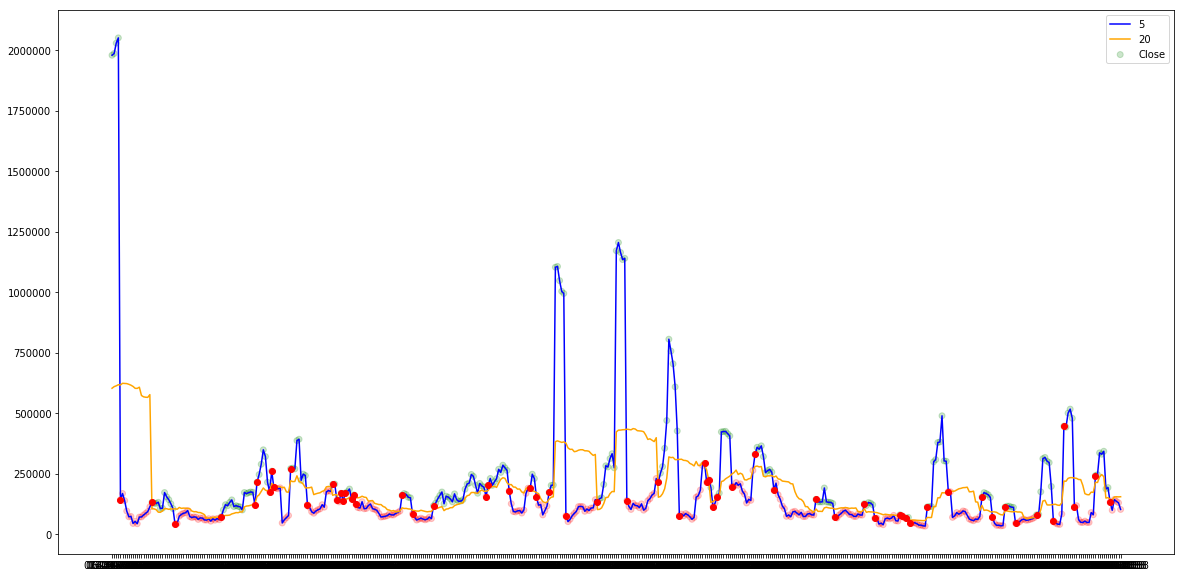

Net_Profit for  5 - 20 Moving Average =  -17652064
Accuracy =  55.833333333333336 %


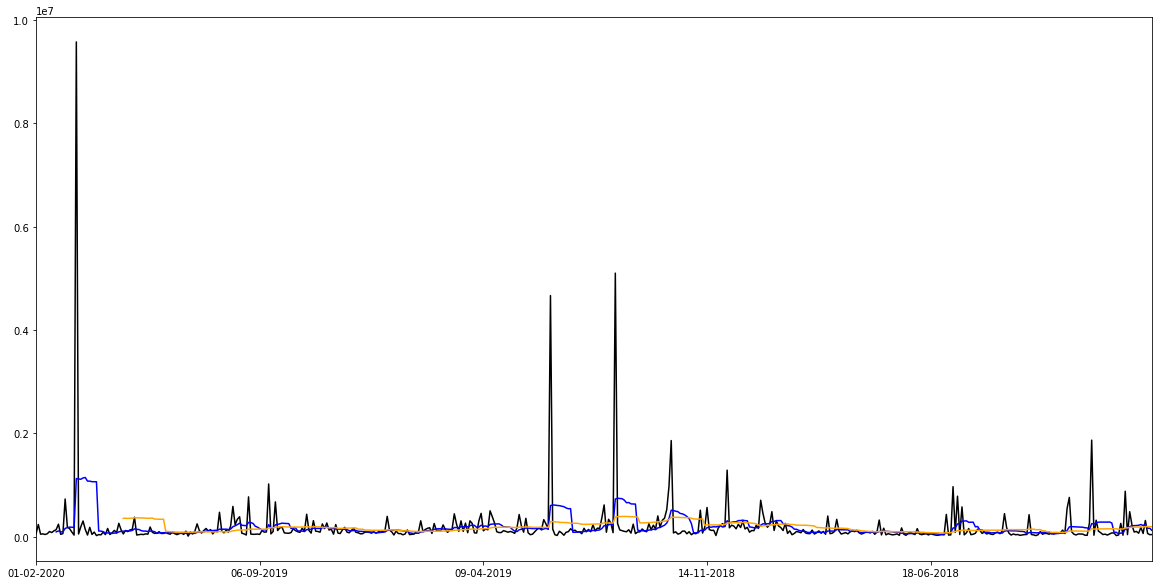

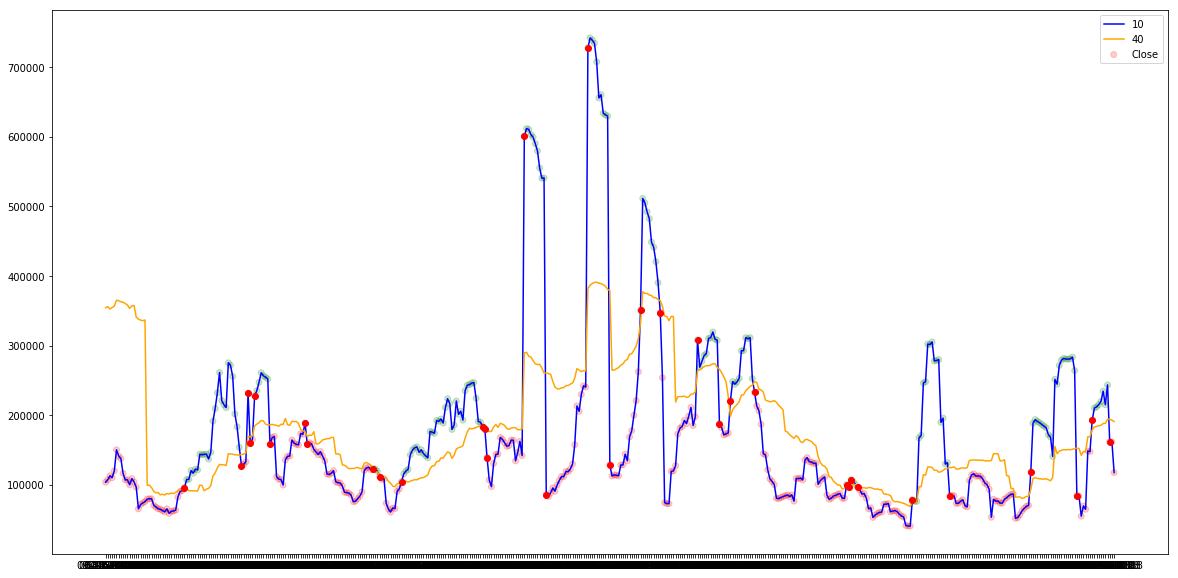

Net_Profit for  10 - 40 Moving Average =  -31077654
Accuracy =  54.78260869565217 %


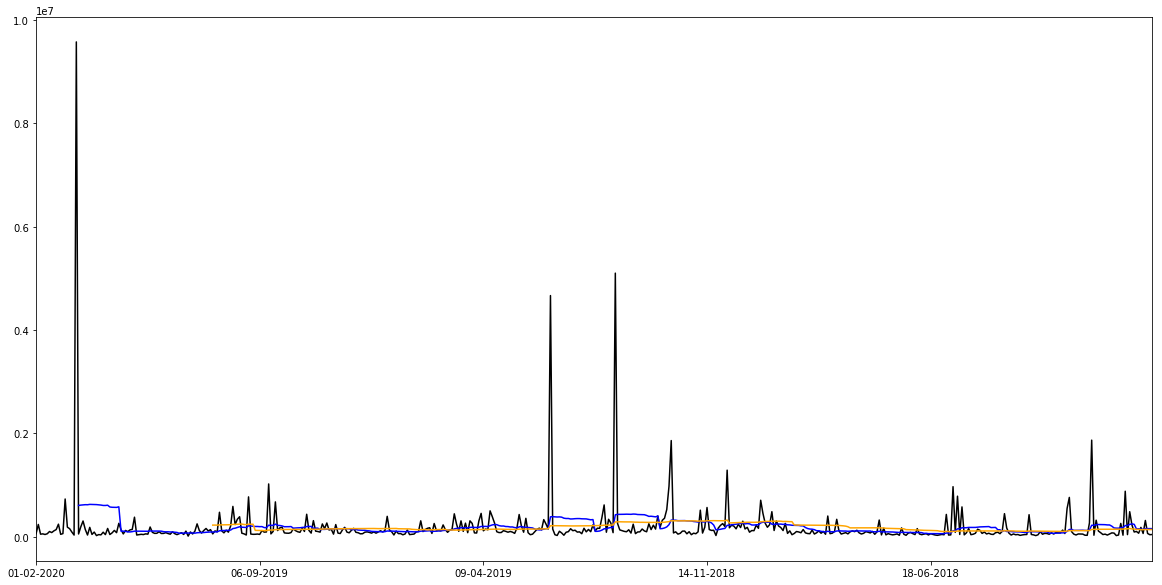

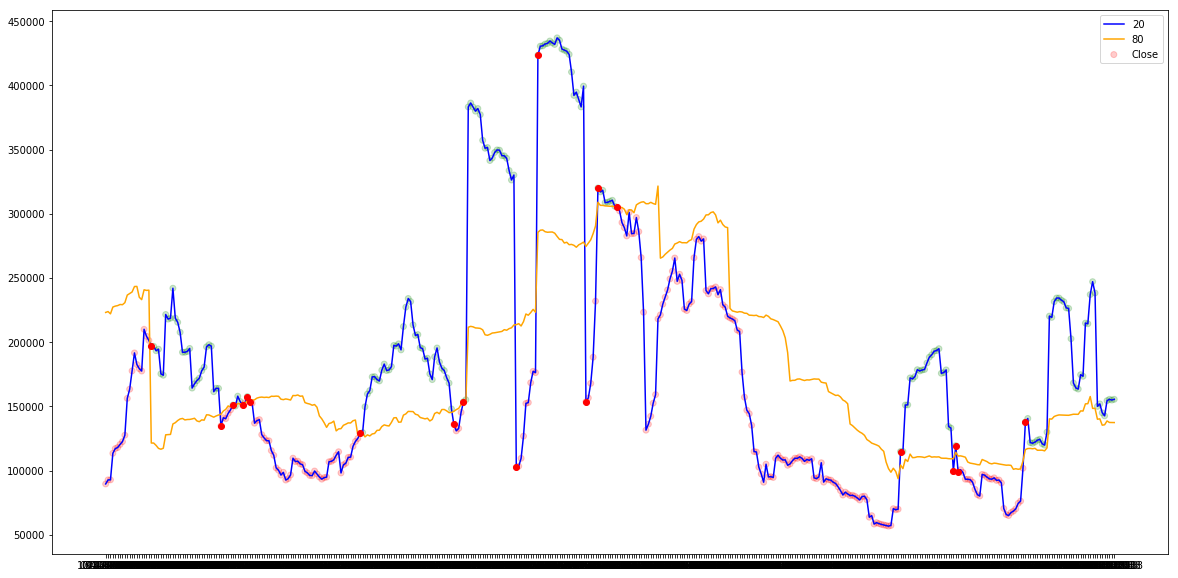

Net_Profit for  20 - 80 Moving Average =  -16860579
Accuracy =  54.047619047619044 %


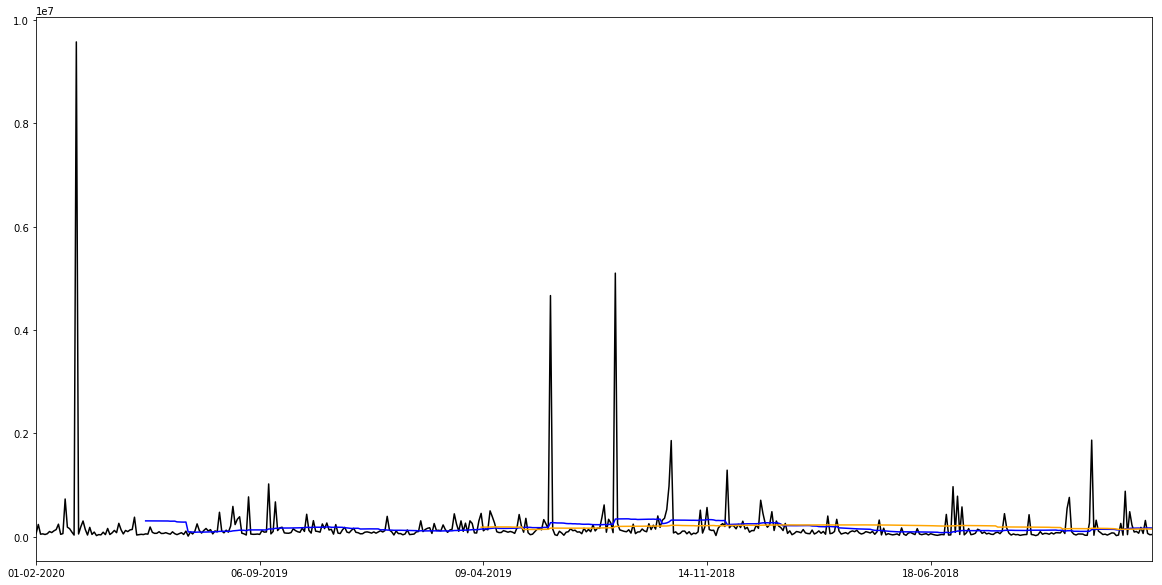

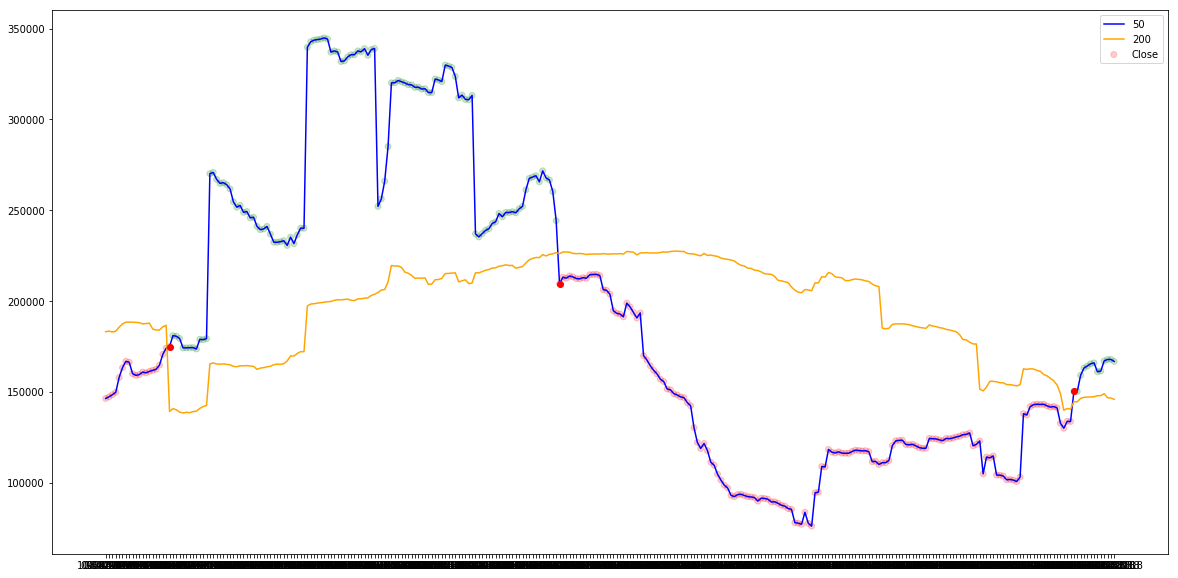

Net_Profit for  50 - 200 Moving Average =  -727881
Accuracy =  49.0 %


In [24]:
window = [1,5,10,20,50]

for i in window:
    plt.figure(figsize=(20,10))
    tele_data['Close'].plot(color='black')
    moving_i = tele_data['Close'].rolling(i).mean()
    moving_i .plot(color='b')

    moving_4i = tele_data['Close'].rolling(4*i).mean()
    moving_4i.plot(color='orange')
    plt.show()

    plt.figure(figsize=(20,10))
    moving_4i = moving_4i.dropna()
    moving_i = moving_i.iloc[len(moving_i)-len(moving_4i):]
    close_i = tele_data['Close']
    close_i = close_i.iloc[len(close_i)-len(moving_4i):]

    plt.plot(moving_i.index,moving_i,color='blue',label=str(i))
    plt.plot(moving_i.index,moving_4i,color='orange',label=str(4*i))

    my_color_i = np.where(moving_i>moving_4i,'g','r')
    plt.scatter(moving_i.index,moving_i,color=my_color_i,alpha=0.2)
    plt.legend()

    price_diff_i = (moving_i - moving_4i)
    zero_crossings_i = np.where(np.diff(np.sign(price_diff_i)))[0]
    zero_crossings_i+=1
    plt.plot(moving_i.index[zero_crossings_i],moving_i[zero_crossings_i],'ro')
    plt.show()

    buy_i = 0
    sell_i = 0

    net_profit_i = 0

    if my_color_i[zero_crossings_i[0]] == 'r':
        sell_i = close_i[zero_crossings_i[0]]
    else :
        buy_i = close_i[zero_crossings_i[0]]

    for j in zero_crossings_i[1:]:
        if my_color_i[j] == 'r':
            net_profit_i += close_i[j] - buy_i
            sell_i = close_i[j]
        else : 
            net_profit_i+=sell_i-close_i[j]
            buy_i = close_i[j]

    print("Net_Profit for ",i,"-",4*i,"Moving Average = ",net_profit_i)
    
    num_true = 0
    num_false = 0

    for k,j in enumerate(my_color_i[:-1]):
        if j=='r':
            if close_i[k+1]>=close_i[k]:
                num_true+=1
            else:
                num_false+=1
        else:
            if close_i[k+1]<=close_i[k]:
                num_true+=1
            else:
                num_false+=1

    print('Accuracy = ',(num_true/(num_true+num_false))*100,'%')

Stocks with extreme changes like that of kotak create a net loss with moving average algorithm as the algorithm has to wait for the closing price to make its decision and in that time the damage is done.

# Housing Development Finance Corp Analysis

In [25]:
house_data = pd.read_csv('housingFin.csv',index_col='Date')

In [26]:
print(house_data.shape)
print(house_data.columns)
print(house_data.head())

(1043, 7)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adjustment Factor',
       'Adjustment Type'],
      dtype='object')
                   Open         High          Low        Close    Volume  \
Date                                                                       
2015-01-01  1083.643516  1083.643516  1070.742998  1073.562000   36260.0   
2015-01-02  1073.131983  1124.638495  1073.131983  1119.764966   91131.0   
2015-01-05  1125.689649  1126.645243  1099.936392  1105.287718   49817.0   
2015-01-06  1096.066237  1098.933019  1046.375353  1053.494527  117772.0   
2015-01-07  1055.596834  1065.630570  1047.760964  1051.201102  110656.0   

            Adjustment Factor  Adjustment Type  
Date                                            
2015-01-01                NaN              NaN  
2015-01-02                NaN              NaN  
2015-01-05                NaN              NaN  
2015-01-06                NaN              NaN  
2015-01-07                NaN              N

In [27]:
house_data = house_data.drop(['Adjustment Factor','Adjustment Type'],axis=1)
house_data.head()

Open         High          Low        Close    Volume
Date                                                                    
2015-01-01  1083.643516  1083.643516  1070.742998  1073.562000   36260.0
2015-01-02  1073.131983  1124.638495  1073.131983  1119.764966   91131.0
2015-01-05  1125.689649  1126.645243  1099.936392  1105.287718   49817.0
2015-01-06  1096.066237  1098.933019  1046.375353  1053.494527  117772.0
2015-01-07  1055.596834  1065.630570  1047.760964  1051.201102  110656.0

In [28]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=house_data.index,
                open=house_data['Open'],
                high=house_data['High'],
                low=house_data['Low'],
                close=house_data['Close'])])

fig.show()

### Calculating the profit for 10-40 window

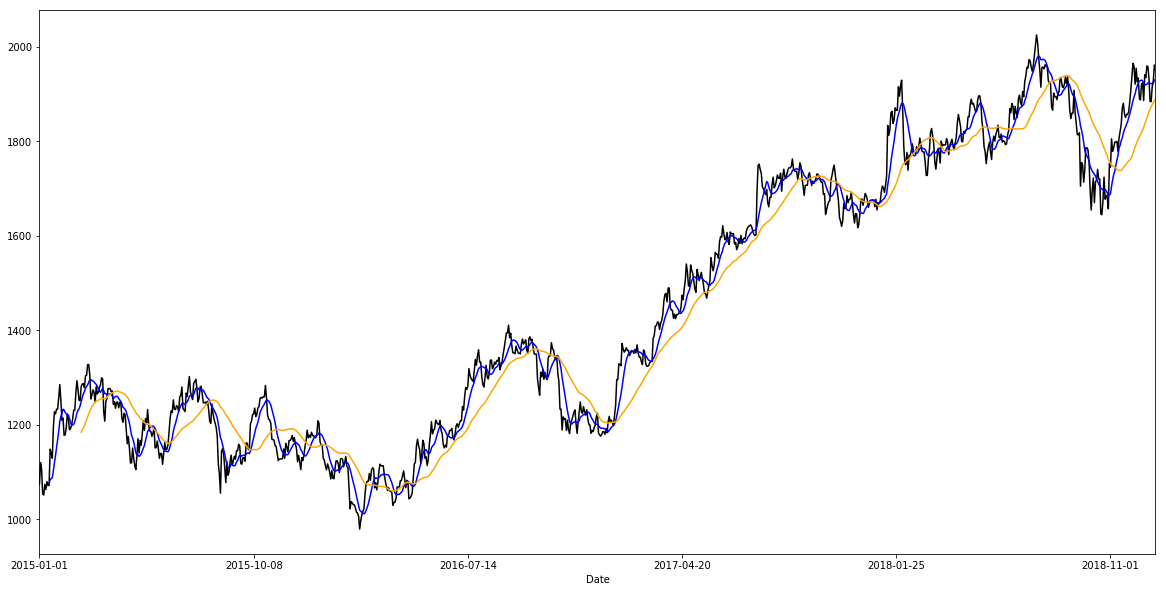

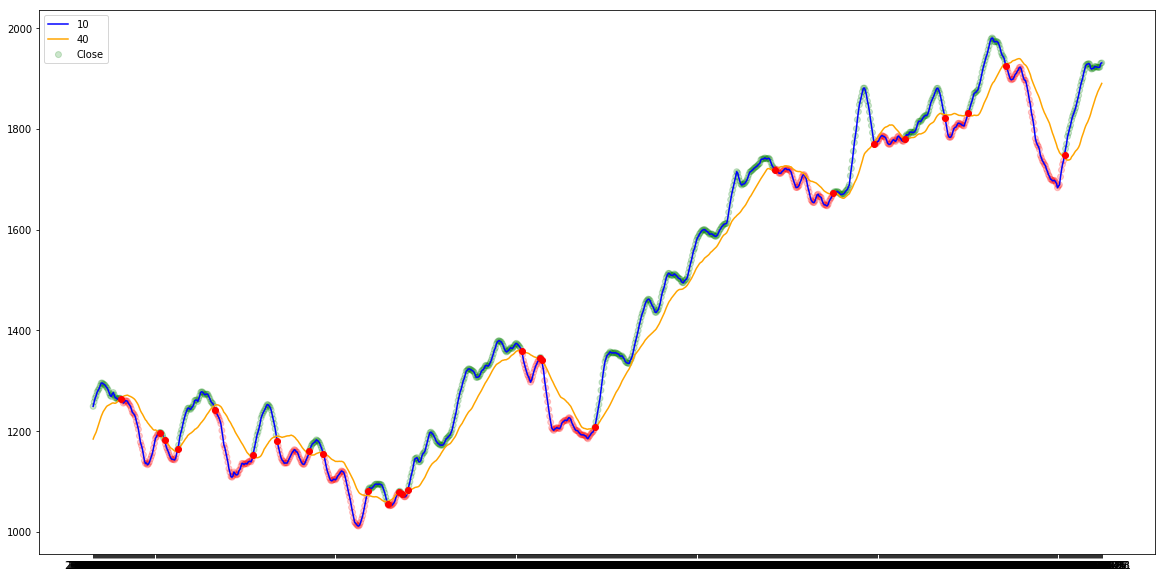

Net_Profit for  10 - 40 Moving Average =  264.9542249999995


In [29]:
i = 10
plt.figure(figsize=(20,10))
house_data['Close'].plot(color='black')
moving_i = house_data['Close'].rolling(i).mean()
moving_i.plot(color='b')

moving_4i = house_data['Close'].rolling(4*i).mean()
moving_4i.plot(color='orange')
plt.show()

plt.figure(figsize=(20,10))
moving_4i = moving_4i.dropna()
moving_i = moving_i.iloc[len(moving_i)-len(moving_4i):]
close_i = house_data['Close']
close_i = close_i.iloc[len(close_i)-len(moving_4i):]

plt.plot(moving_i.index,moving_i,color='blue',label=str(i))
plt.plot(moving_i.index,moving_4i,color='orange',label=str(4*i))

my_color_i = np.where(moving_i>moving_4i,'g','r')
plt.scatter(moving_i.index,moving_i,color=my_color_i,alpha=0.2)
plt.legend()

price_diff_i = (moving_i - moving_4i)
zero_crossings_i = np.where(np.diff(np.sign(price_diff_i)))[0]
zero_crossings_i+=1
plt.plot(moving_i.index[zero_crossings_i],moving_i[zero_crossings_i],'ro')
plt.show()

buy_i = 0
sell_i = 0

net_profit_i = 0

if my_color_i[zero_crossings_i[0]] == 'r':
    sell_i = close_i[zero_crossings_i[0]]
else :
    buy_i = close_i[zero_crossings_i[0]]

for j in zero_crossings_i[1:]:
    if my_color_i[j] == 'r':
        net_profit_i += close_i[j] - buy_i
        sell_i = close_i[j]
    else : 
        net_profit_i+=sell_i-close_i[j]
        buy_i = close_i[j]

print("Net_Profit for ",i,"-",4*i,"Moving Average = ",net_profit_i)

In [31]:
num_true = 0
num_false = 0

for i,j in enumerate(my_color_i[:-1]):
    if j=='r':
        if close_i[i+1]>=close_i[i]:
            num_true+=1
        else:
            num_false+=1
    else:
        if close_i[i+1]<=close_i[i]:
            num_true+=1
        else:
            num_false+=1
            
print('Accuracy = ',(num_true/(num_true+num_false))*100,'%')

Accuracy =  52.34297108673977 %


### Calculating the profit and accuracy for a time span of 200 days

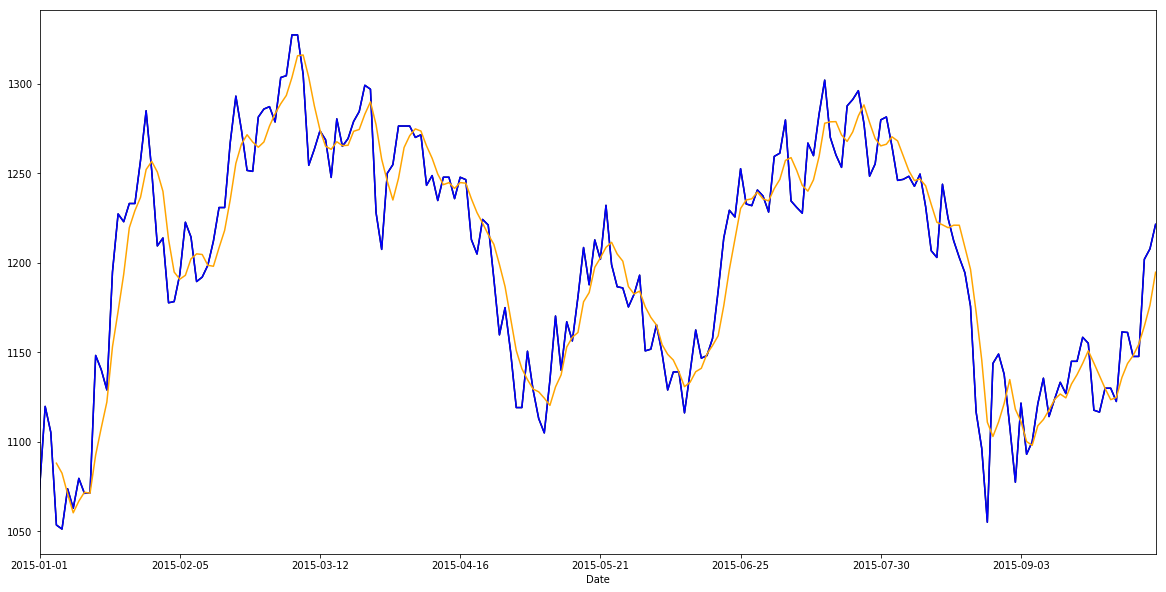

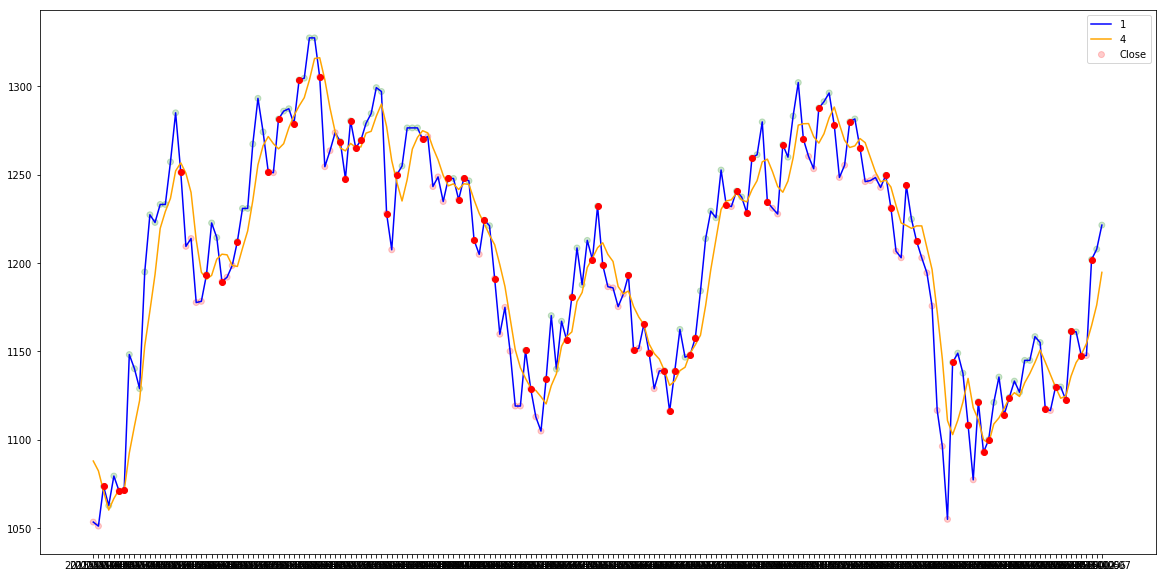

Net_Profit for  1 - 4 Moving Average =  -368.814045000001


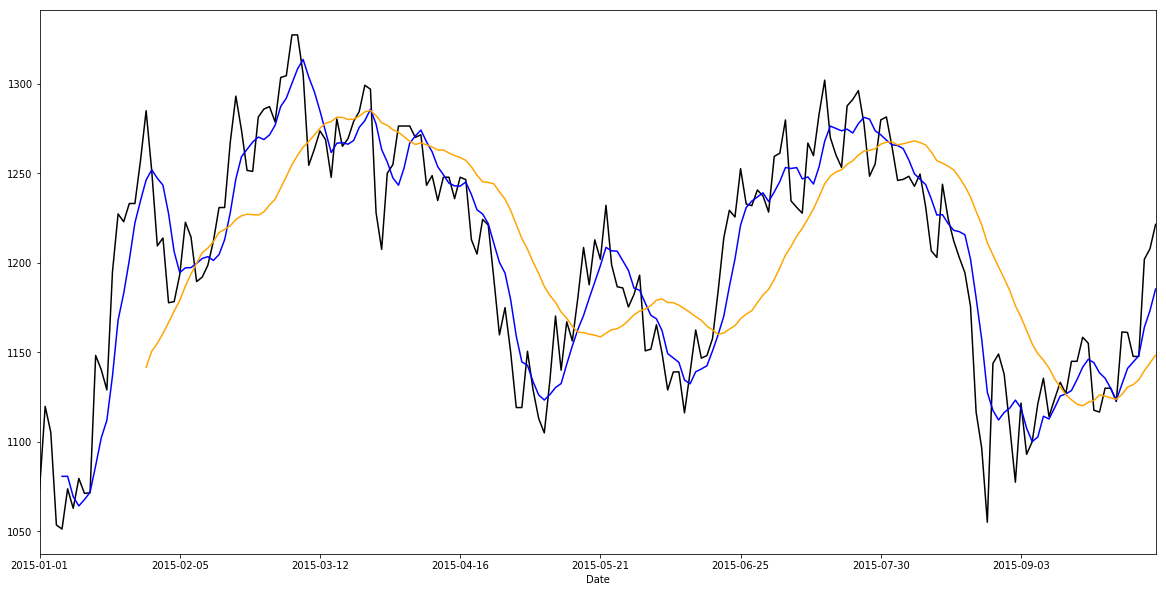

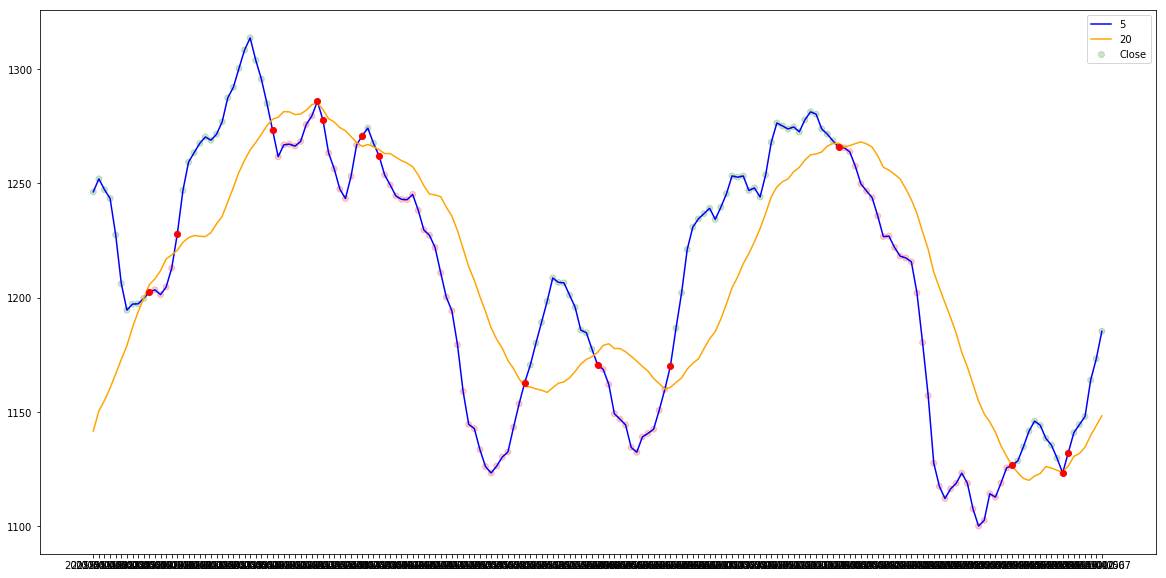

Net_Profit for  5 - 20 Moving Average =  -111.95901800000001


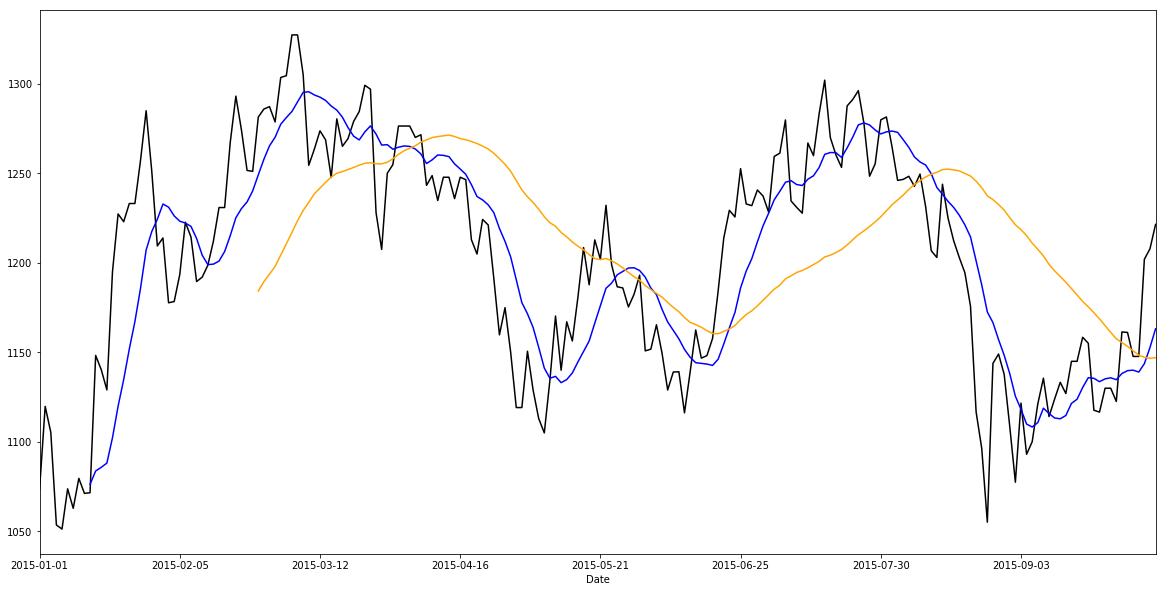

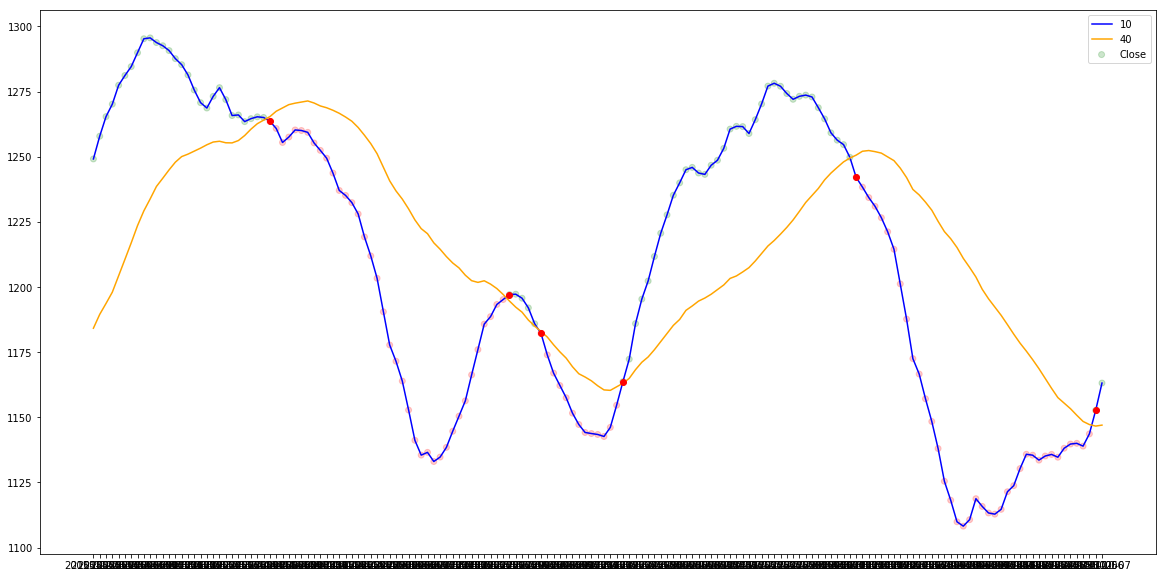

Net_Profit for  10 - 40 Moving Average =  -10.383467999999993


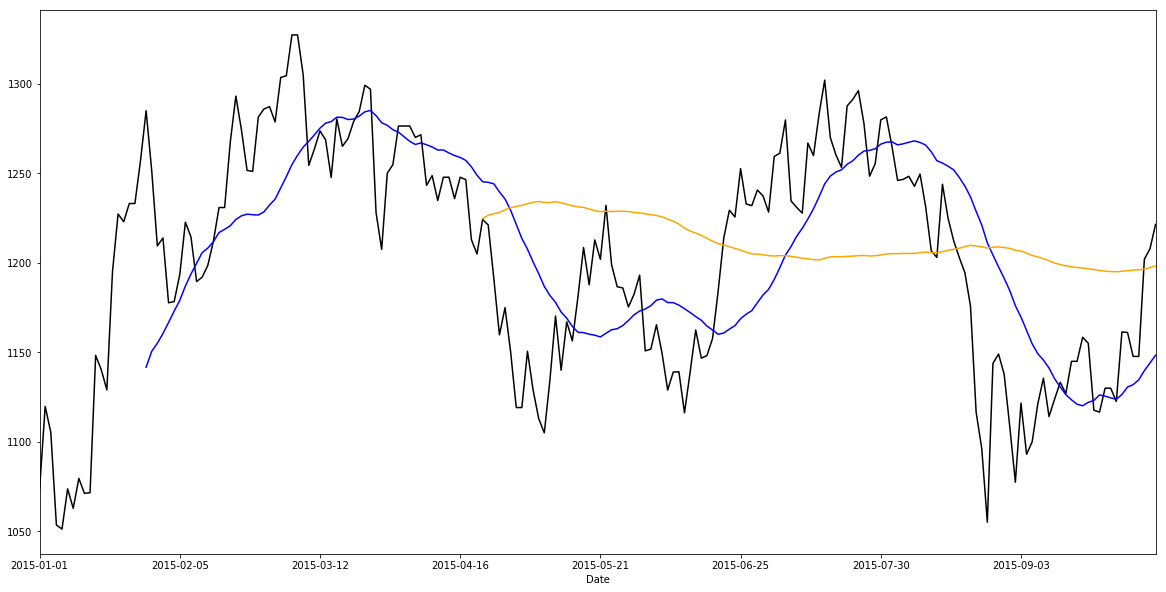

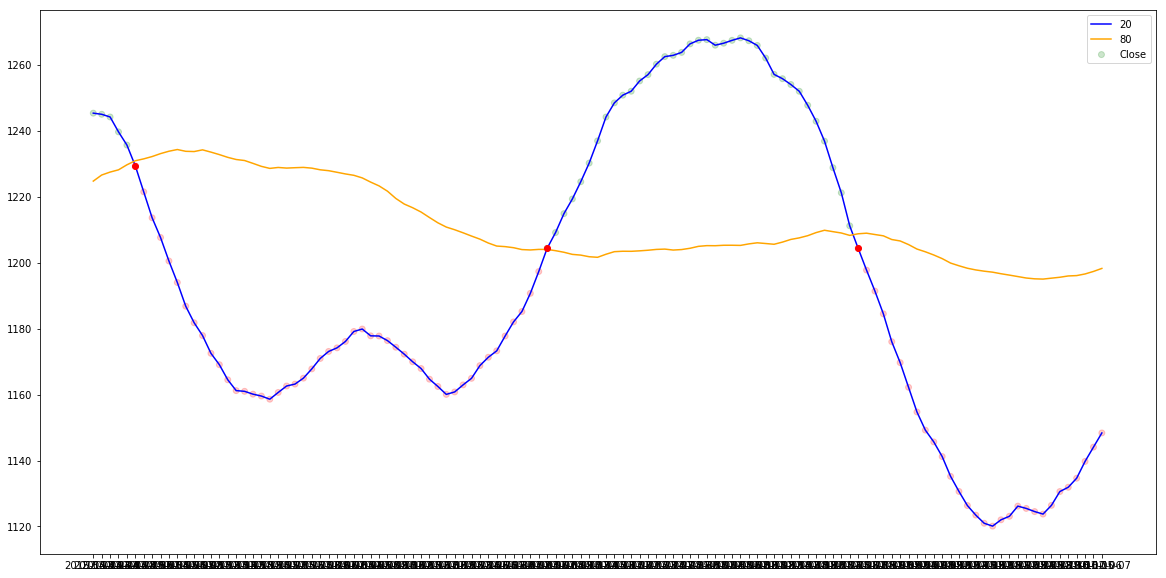

Net_Profit for  20 - 80 Moving Average =  -265.7593720000002


In [35]:
window = [1,5,10,20]
for i in window:
    plt.figure(figsize=(20,10))
    house_data['Close'][:200].plot(color='black')
    moving_i = house_data['Close'][:200].rolling(i).mean()
    moving_i.plot(color='b')

    moving_4i = house_data['Close'][:200].rolling(4*i).mean()
    moving_4i.plot(color='orange')
    plt.show()

    plt.figure(figsize=(20,10))
    moving_4i = moving_4i.dropna()
    moving_i = moving_i.iloc[len(moving_i)-len(moving_4i):]
    close_i = house_data['Close'][:200]
    close_i = close_i.iloc[len(close_i)-len(moving_4i):]

    plt.plot(moving_i.index,moving_i,color='blue',label=str(i))
    plt.plot(moving_i.index,moving_4i,color='orange',label=str(4*i))

    my_color_i = np.where(moving_i>moving_4i,'g','r')
    plt.scatter(moving_i.index,moving_i,color=my_color_i,alpha=0.2)
    plt.legend()

    price_diff_i = (moving_i - moving_4i)
    zero_crossings_i = np.where(np.diff(np.sign(price_diff_i)))[0]
    zero_crossings_i+=1
    plt.plot(moving_i.index[zero_crossings_i],moving_i[zero_crossings_i],'ro')
    plt.show()

    buy_i = 0
    sell_i = 0

    net_profit_i = 0

    if my_color_i[zero_crossings_i[0]] == 'r':
        sell_i = close_i[zero_crossings_i[0]]
    else :
        buy_i = close_i[zero_crossings_i[0]]

    for j in zero_crossings_i[1:]:
        if my_color_i[j] == 'r':
            net_profit_i += close_i[j] - buy_i
            sell_i = close_i[j]
        else : 
            net_profit_i+=sell_i-close_i[j]
            buy_i = close_i[j]

    print("Net_Profit for ",i,"-",4*i,"Moving Average = ",net_profit_i)